In [2]:
import os
# Find the latest version of spark 3.0  from http://www-us.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.1'
spark_version = 'spark-2.4.7'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark


# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading package lists... Done


In [3]:
!pip install s3fs

     |████████████████████████████████| 102kB 9.0MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 7.2MB 13.6MB/s 
     |████████████████████████████████| 1.3MB 46.8MB/s 
     |████████████████████████████████| 143kB 48.0MB/s 
     |████████████████████████████████| 143kB 48.5MB/s 
     |████████████████████████████████| 296kB 50.3MB/s 
  Created wheel for aiobotocore: filename=aiobotocore-1.2.0-cp36-none-any.whl size=45554 sha256=8e4c3ab95c77783ce647fc2935b59ceb299f94e978a758cbc92d705fa7655d8d
  Stored in directory: /root/.cache/pip/wheels/9a/47/92/5873782cddd0c32be41eb43475d1f7e532d420cfa30a89b988
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=8fecd07bb09f7b16a405c819517273066fdcf6966863bc6cfec74192c10c4fa0
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built aiobotocore idna-ssl
ERROR: requests 2.23.0 has requirement url

In [35]:
#Import csv from S3 Bucket
import pandas as pd
import s3fs
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('s3://ucsd-diamond-project/diamonds.csv')

#Drop id column since it is not necessary for the model
df = df.drop(["id"], axis=1)
df

,carat,cut,color,clarity,depth,table_ratio,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [36]:
#Transform strings column into numerical values so that the model can use them
df["cut"].replace({"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}, inplace = True)
df["color"].replace({"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D":7}, inplace = True)
df["clarity"].replace({"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1":7, "IF":8}, inplace = True)
df

,carat,cut,color,clarity,depth,table_ratio,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [37]:
#Set X and y variables for the model
#In this case y is what we are trying to predict (price) and X is all the other columns
X = df[["carat","cut","color","clarity","depth","table_ratio","x","y","z"]]
y = df["price"].values.reshape(-1,1)
print(X.shape, y.shape)

(53940, 9) (53940, 1)


In [38]:
#Linear Regression Model
#Create train and test split using random_state 42 for consistency
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
#Create Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [40]:
#Fit model to train sets
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

#Score the model
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.907052909615842
Testing Score: 0.9068514326187412


Text(0.5, 1.0, 'Residual Plot')

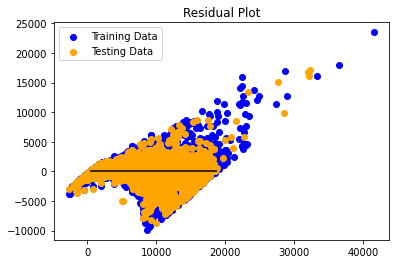

In [41]:
#Plot the Test and Training set to ensure consistency
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

Feature: 0, Score: 10710.64995
Feature: 1, Score: 123.05338
Feature: 2, Score: 323.93771
Feature: 3, Score: 502.76734
Feature: 4, Score: -80.17689
Feature: 5, Score: -27.26570
Feature: 6, Score: -854.46574
Feature: 7, Score: 28.69989
Feature: 8, Score: -14.03548


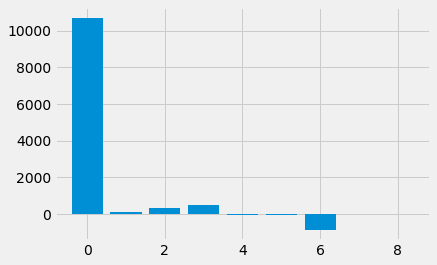

In [63]:
from matplotlib import pyplot
# Get model coefficients and plot them
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

In [ ]:
#Random Forest Model

In [43]:
#Define labels and features
labels = np.array(df["price"])
features = df.drop("price", axis = 1)

feature_list = list(features.columns)
features = np.array(features)

In [44]:
#Split the dataset for the model
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [45]:
#Ensure Shapes are correct to run Random Forrest model
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (40455, 9)
Training Labels Shape: (40455,)
Testing Features Shape: (13485, 9)
Testing Labels Shape: (13485,)


In [67]:
#Create random forrest regression
rf = RandomForestRegressor(n_estimators=250, random_state= 42)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [68]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')


Mean Absolute Error: 267.0 dollars.


Variable: carat                Importance: 0.63
Variable: y                    Importance: 0.26
Variable: clarity              Importance: 0.06
Variable: color                Importance: 0.03
Variable: x                    Importance: 0.01
Variable: z                    Importance: 0.01
Variable: cut                  Importance: 0.0
Variable: depth                Importance: 0.0
Variable: table_ratio          Importance: 0.0


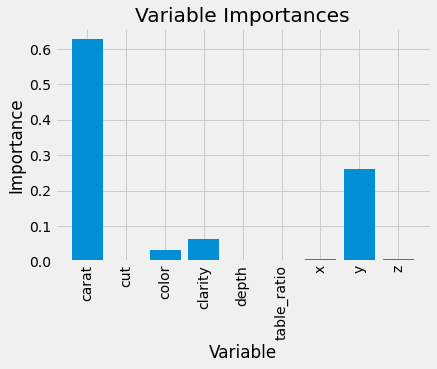

In [69]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [70]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.57 %.


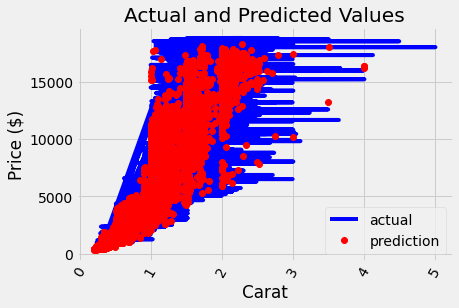

In [100]:
#Run a for loop to append the carat values in the test set to be used in the graph
test_carats = []
for i in test_features:
  test_carats.append(i[0])

#Create dataframes for plotting actuals vs predictions
true_data = df[["carat","price"]]
carat = test_carats
prediction_data = pd.DataFrame(data = {"Carat": carat, "Price": predictions})

# Plot the actual values
plt.plot(true_data['carat'], true_data['price'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(prediction_data['Carat'], prediction_data['Price'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Carat'); plt.ylabel('Price ($)'); plt.title('Actual and Predicted Values');
